In [ ]:
import numpy as np

# Define the image
img = np.array([[2, 3, 3, 0, 0],
                [4, 0, 5, 6, 3],
                [6, 6, 6, 5, 0],
                [3, 0, 1, 1, 2],
                [2, 4, 1, 2, 1]])

# Compute the histogram
hist, bins = np.histogram(img, bins=8, range=(0,7))

In [ ]:
hist

array([5, 4, 4, 4, 2, 2, 4, 0])

In [ ]:
cdf = hist.cumsum()
cdf

array([ 5,  9, 13, 17, 19, 21, 25, 25])

In [ ]:
cdf_normalized = (8 / cdf.max()) * cdf-1
cdf_normalized

array([0.6 , 1.88, 3.16, 4.44, 5.08, 5.72, 7.  , 7.  ])

In [ ]:
# Apply the new pixel intensities to the original image
img_eq = np.interp(img, bins[:-1], cdf_normalized)

# Round the pixel intensities to the nearest integer
img_eq = np.round(img_eq).astype(int)


In [ ]:
img_eq

array([[4, 5, 5, 1, 1],
       [5, 1, 7, 7, 5],
       [7, 7, 7, 7, 1],
       [5, 1, 2, 2, 4],
       [4, 5, 2, 4, 2]])

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

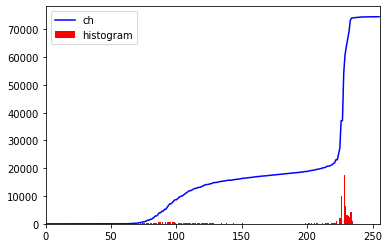

In [ ]:
img = cv2.imread('/content/eight.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

ch = hist.cumsum()


plt.plot(ch, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('ch','histogram'), loc = 'upper left')
plt.show()

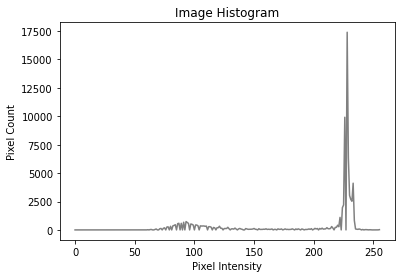

In [ ]:
plt.plot(hist, color='gray')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()

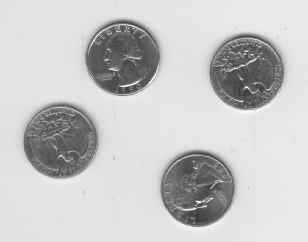

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(242, 308)

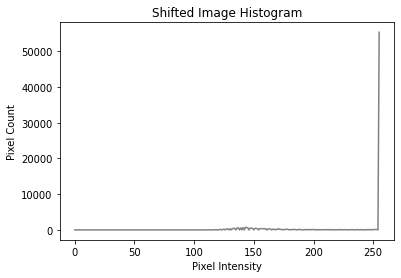

In [ ]:
shifted_img = cv2.add(img, 50)
hist2, bins = np.histogram(shifted_img.ravel(), 256, [0, 256])
plt.plot(hist2, color='gray')
plt.title('Shifted Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()

In [ ]:
equ = cv2.equalizeHist(img)
equ

array([[ 93,  93,  93, ..., 250, 236, 250],
       [ 93,  93,  93, ..., 250, 250, 250],
       [127, 127,  93, ..., 250, 236, 250],
       ...,
       [ 93, 127,  93, ..., 250, 250, 250],
       [127, 127,  93, ..., 250, 236, 250],
       [127, 127, 127, ..., 236, 250, 253]], dtype=uint8)

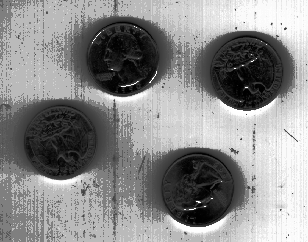

In [ ]:
cv2_imshow(equ)

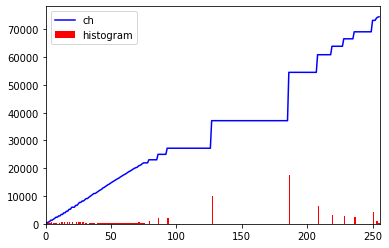

In [ ]:
hist1,bins = np.histogram(equ.flatten(),256,[0,256])
ch1 = hist1.cumsum()


plt.plot(ch1, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('ch','histogram'), loc = 'upper left')
plt.show()

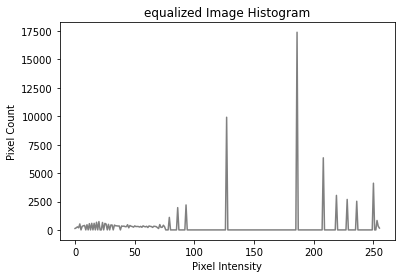

In [ ]:
plt.plot(hist1, color='gray')
plt.title('equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()

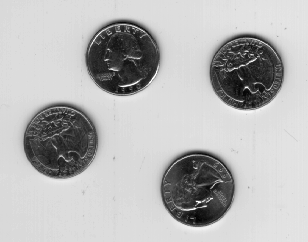

In [ ]:
min_val = np.min(img)
max_val = np.max(img)

# Create the lookup table
LUT = np.zeros(256, dtype=np.uint8)
LUT[min_val:max_val+1] = np.linspace(0, 255, max_val-min_val+1)

# Apply the LUT to the image
result = cv2.LUT(img, LUT)

# Display the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
gauss_noise=np.zeros((242, 308),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [ ]:
gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

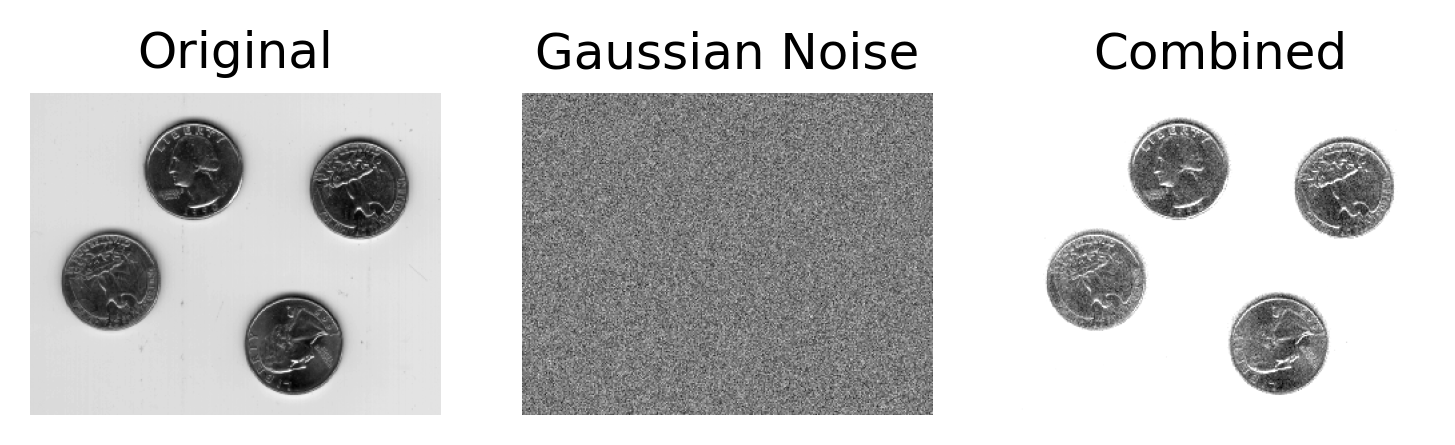

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

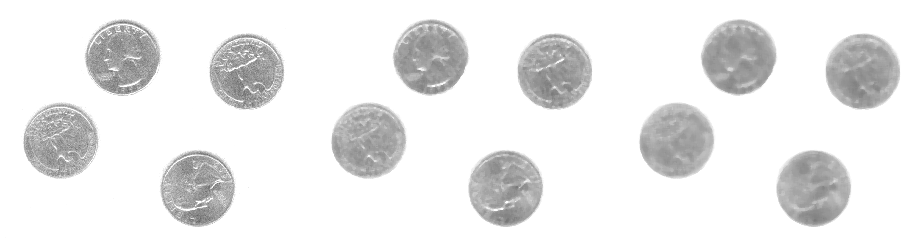

In [ ]:
median = cv2.medianBlur(gn_img, 3)
median1 = cv2.medianBlur(gn_img, 5)
compare = np.concatenate((gn_img, median, median1), axis=1) #side by side comparison

cv2_imshow(compare)

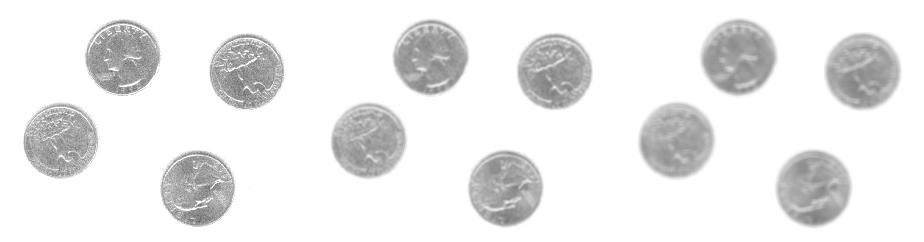

In [ ]:
blur = cv2.blur(gn_img,(3,3))
blur1 = cv2.blur(gn_img,(5,5))
compare = np.concatenate((gn_img, blur, blur1), axis=1)
cv2_imshow(compare)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img_path = '/content/cameraman.jpg'
img = cv2.imread(img_path)[:,:,0] # gray-scale image

r = 50 # how narrower the window is
ham = np.hamming(487)[:,None] # 1D hamming
ham2d = np.sqrt(np.dot(ham, ham.T)) ** r # expand to 2D hamming

In [ ]:
img.shape

(487, 487)

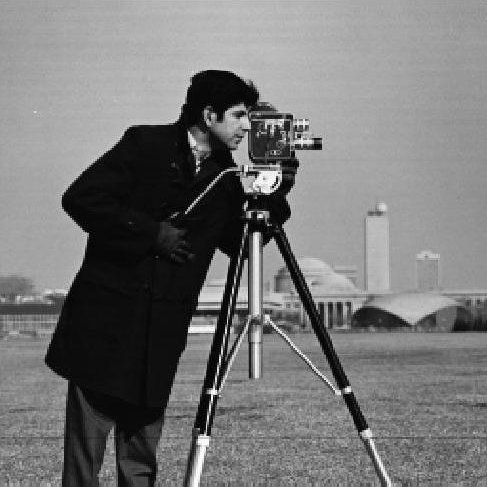

In [ ]:
cv2_imshow(img)

In [ ]:
f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = ham2d * f_complex

/usr/local/lib/python3.9/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


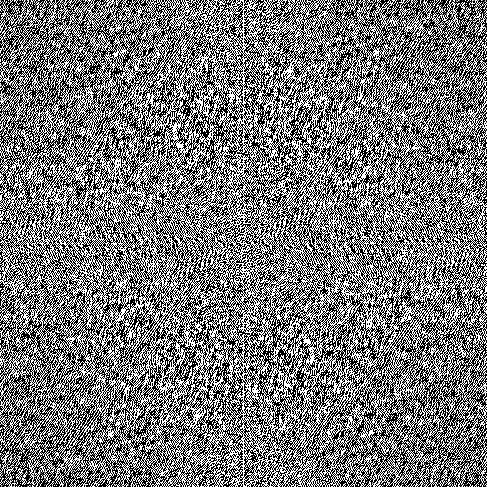

In [ ]:
cv2_imshow(f_complex)

/usr/local/lib/python3.9/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


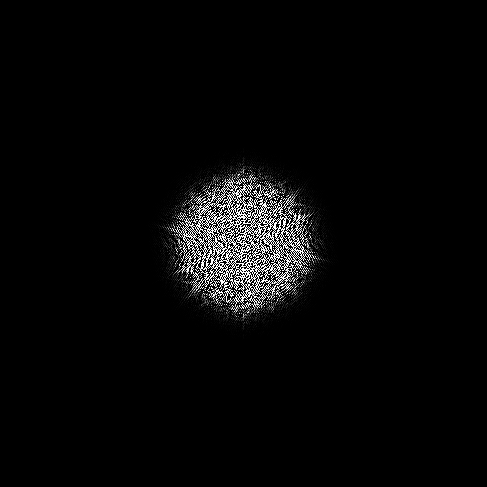

In [ ]:
cv2_imshow(f_filtered)

In [ ]:
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()

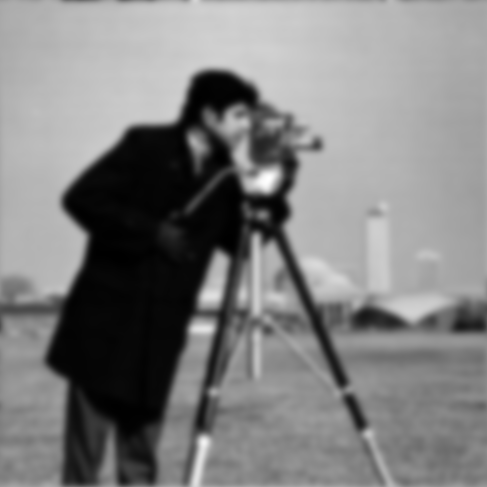

In [ ]:
cv2_imshow(filtered_img)

In [ ]:
import matplotlib.pyplot as plt
import time
import math

In [ ]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((math.dist((y,x),center)**2)/(2*(D0**2))))
    return base

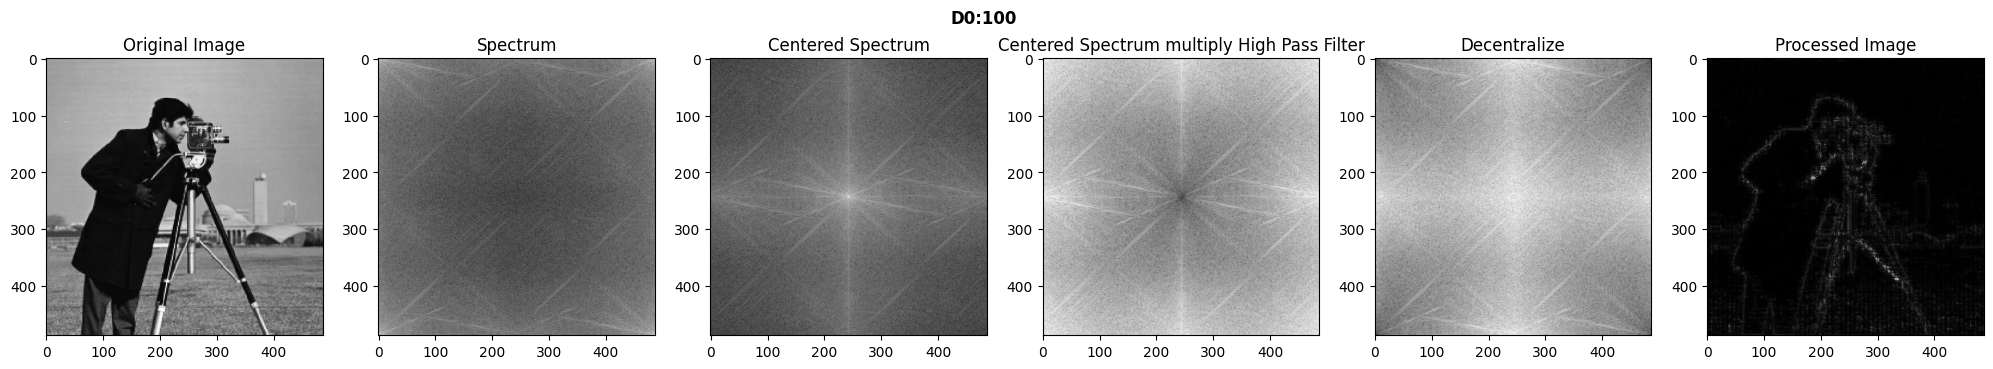

In [ ]:
def try_d0s_hp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


    plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    HighPassCenter = center * gaussianHP(d0,img.shape)
    plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

    HighPass = np.fft.ifftshift(HighPassCenter)
    plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

    inverse_HighPass = np.fft.ifft2(HighPass)
    plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()


for i in [100]:
    try_d0s_hp(i)

In [ ]:
img_path = '/content/eight.jpg'
img = cv2.imread(img_path)[:,:,0]

In [ ]:
gauss_noise=np.zeros((242,308),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)
f = cv2.dft(gauss_noise.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
gau = f_shifted[:,:,0]*1j + f_shifted[:,:,1]

(<Axes: title={'center': 'Processed Image'}>,
 Text(0.5, 1.0, 'Processed Image'))

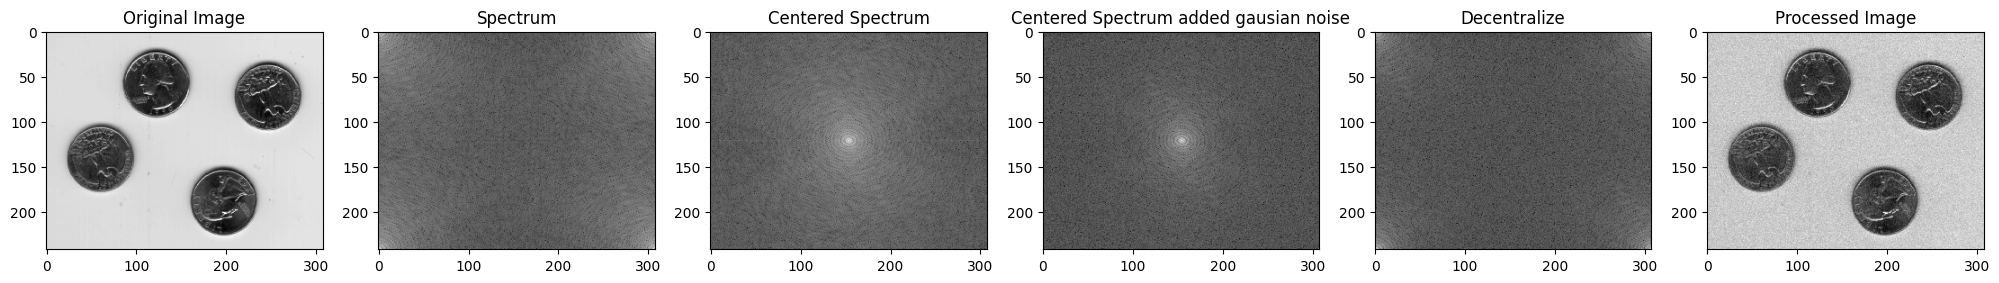

In [ ]:
plt.figure(figsize=(25, 20), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")
gauCenter = center + gau
plt.subplot(164), plt.imshow(np.log(1+np.abs(gauCenter)), "gray"), plt.title("Centered Spectrum added gausian noise")

gau = np.fft.ifftshift(gauCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(gau)), "gray"), plt.title("Decentralize")

inverse_gau = np.fft.ifft2(gau)
plt.subplot(166), plt.imshow(np.abs(inverse_gau), "gray"), plt.title("Processed Image")

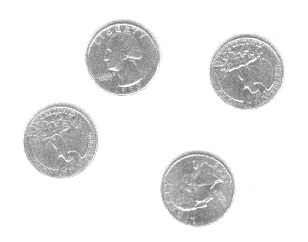

In [ ]:
cv2_imshow(inverse_gau)

In [ ]:
from scipy.signal import wiener


In [ ]:
we_img= wiener(inverse_gau, mysize=5, noise=None)


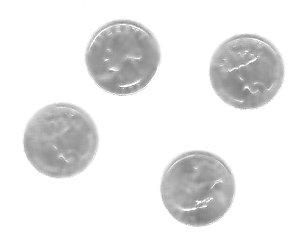

In [ ]:
cv2_imshow(we_img)

In [ ]:
img_path = '/content/cameraman.jpg'
img = cv2.imread(img_path)[:,:,0]

In [ ]:
imp_noise=np.zeros((487,487),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]
f = cv2.dft(imp_noise.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
imp = f_shifted[:,:,0]*1j + f_shifted[:,:,1]

(<Axes: title={'center': 'Processed Image'}>,
 Text(0.5, 1.0, 'Processed Image'))

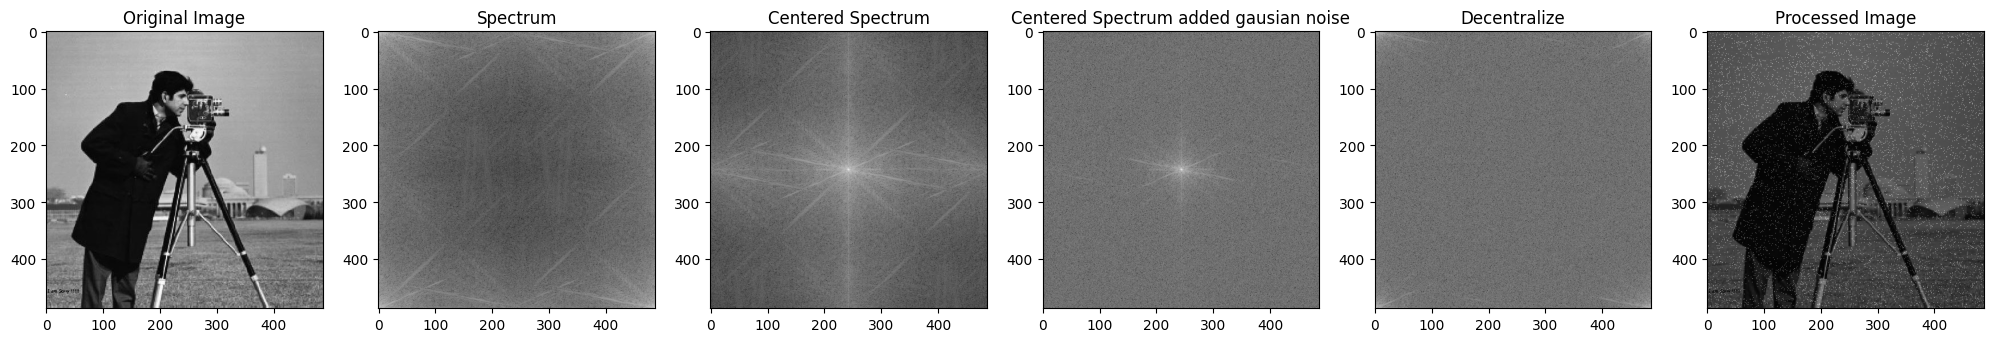

In [ ]:
plt.figure(figsize=(25, 20), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")
impCenter = center + imp
plt.subplot(164), plt.imshow(np.log(1+np.abs(impCenter)), "gray"), plt.title("Centered Spectrum added gausian noise")

imp = np.fft.ifftshift(impCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(imp)), "gray"), plt.title("Decentralize")

inverse_imp = np.fft.ifft2(imp)
plt.subplot(166), plt.imshow(np.abs(inverse_imp), "gray"), plt.title("Processed Image")

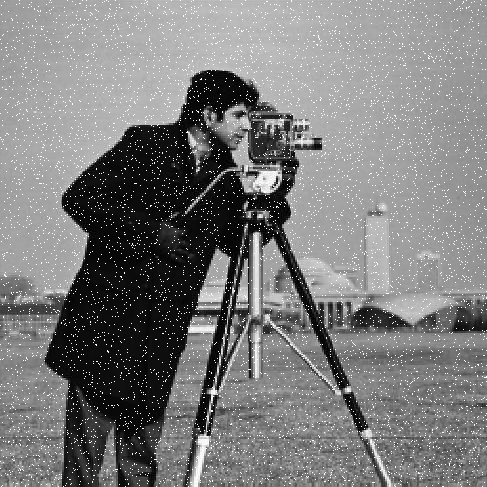

In [ ]:
cv2_imshow(inverse_imp)

In [ ]:
im1 = cv2.blur(inverse_imp,(5,5))